In [14]:
import juggle_tracker.labels as lb
import juggle_tracker.kalman_filter as kf
import matplotlib.pyplot as plt
import numpy as np

In [15]:
data = lb.VideoLabels.load('data/cap3/labels_1.txt')
states = data.balls['0'].states
positions = [s.position for s in states]

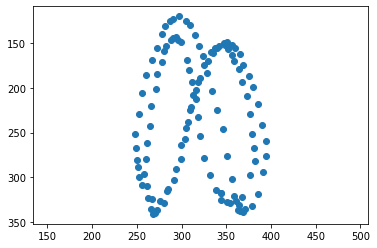

In [16]:
plt.gca().invert_yaxis()
plt.axis('equal')
plt.scatter([p[0] for p in positions], [p[1] for p in positions])

In [41]:
def run_filter(hp):
    kf_states = []
    initial_sd_pos = 10.
    initial_sd_v = 100.
    initial_sd_a = 100.
    kf_state = kf.States(
        means=np.array([[positions[0][0], 0., 0., positions[0][1], 0., 0.]]),
        covariances=np.array([np.diag([initial_sd_pos ** 2, initial_sd_v ** 2, initial_sd_a ** 2] * 2)]))
    total_obs_logp = 0.

    for p in positions[1:]:
        kf_states.append(kf_state)
        kf_state = kf_state.transitioned(1./30., hp)
        kf_state, obs_logp = kf_state.posterior(np.array([True]), np.array([p]), hp)
        total_obs_logp += obs_logp
        
    return kf_states, total_obs_logp

In [42]:
print(kf.Hyperparameters())

Hyperparameters(transition_pos_sd=10.0, transition_v_sd=10.0, transition_a_sd=10000.0, observation_sd=20.0)


In [64]:
obs_logps = []
for transition_v_sd in np.logspace(-1, 1):
    hp = kf.Hyperparameters(transition_v_sd=transition_v_sd)
    obs_logps.append(run_filter(hp)[1])

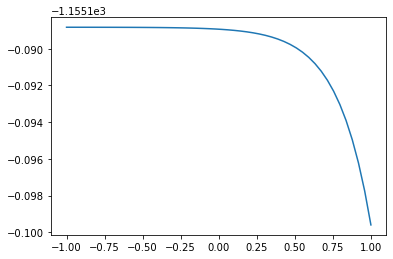

In [65]:
plt.plot(np.linspace(-1, 1), obs_logps)

In [66]:
kf_states, total_obs_logp = run_filter(
    kf.Hyperparameters(transition_pos_sd=1., transition_v_sd=1., transition_a_sd=1.e3))

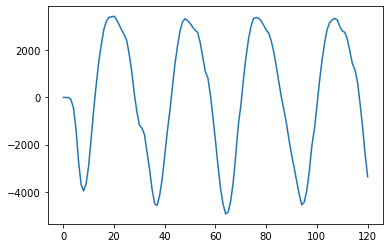

In [67]:
plt.plot([s.means[0][5] for s in kf_states])